<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/ANN_Micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 -4*x + 5

In [ ]:
f(3)

20

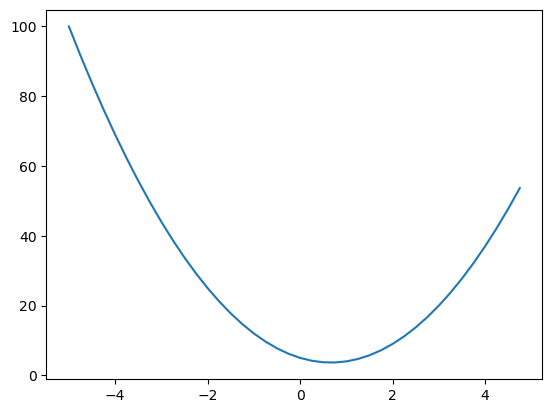

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [ ]:
a = 2
b = -3
c = 10
d = a*b + c
print(d)

4


In [ ]:
h = 0.0001

a = 2
b = -3
c = 10

d1 = a*b + c
c += h
d2 = a*b + c
print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1)/h)

d1 4
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
          self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
      def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
      def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op="", label = ""):
        self.data = data
        self.grad = 0
        self._backward = lambda: None 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
        
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        
       
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        
    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other
        
    def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out
    
    def backward(self):
    
        topo = []
        visited = set()
        def build_topo(v):
              if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
    
        self.grad = 1.0
        for node in reversed(topo):
              node._backward()
    


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 46)

In [ ]:
conda install -c anaconda graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tasos\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    cairo-1.16.0               |       he04af86_2         2.2 MB  anaconda
    certifi-2022.12.7          |   py39haa95532_0         153 KB  anaconda
    conda-23.1.0               |   py39haa95532_0         980 KB  anaconda
    expat-2.4.9                |       h6c2663c_0         306 KB  anaconda
    fribidi-1.0.10             |       h62dcd97_0          66 KB  anaconda
    getopt-win32-0.1           |       h2bbff1b_0          19 KB  anaconda
    glib-2.69.1                |       h5dc1a3c_1         1.8 MB  anaconda
    graphite2-1.3.14           |       hd77b12b_1          97 KB  anaconda
    graphviz-2.50.0         



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda





conda-23.1.0         | 980 KB    | ####9      |  49% 
conda-23.1.0         | 980 KB    | ########## | 100% 
conda-23.1.0         | 980 KB    | ########## | 100% 

expat-2.4.9          | 306 KB    |            |   0% 
expat-2.4.9          | 306 KB    | 5          |   5% 
expat-2.4.9          | 306 KB    | ###1       |  31% 
expat-2.4.9          | 306 KB    | #########4 |  94% 
expat-2.4.9          | 306 KB    | ########## | 100% 

cairo-1.16.0         | 2.2 MB    |            |   0% 
cairo-1.16.0         | 2.2 MB    |            |   1% 
cairo-1.16.0         | 2.2 MB    | 5          |   6% 
cairo-1.16.0         | 2.2 MB    | #4         |  14% 
cairo-1.16.0         | 2.2 MB    | ##9        |  30% 
cairo-1.16.0         | 2.2 MB    | #####5     |  55% 
cairo-1.16.0         | 2.2 MB    | ########3  |  83% 
cairo-1.16.0         | 2.2 MB    | ########## | 100% 

libffi-3.4.2         | 111 KB    |            |   0% 
libffi-3.4.2         | 111 KB    | #4         |  14% 
libffi-3.4.2         | 1

In [ ]:
pip install graphviz

     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

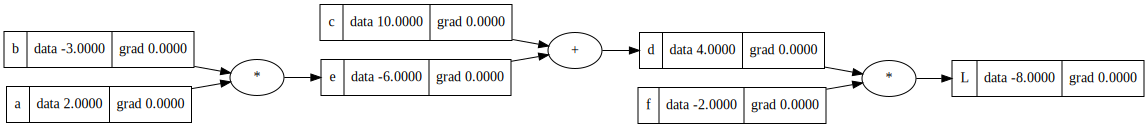

In [ ]:
draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = b * a
d = e + c
L = f * d

print(L.data)



-8.0


dd/dc ?
d = c + e
(f(x+h)-f(x))/h
((c+h+e)-(c+e))/h
(c+h+e-c-e)/h
h/h
1.0

dd/dε = 1.0 με την ίδια μεθοδολογία

ΆΡΑ
θέλουμε dL/dc
Ξέρουμε
dd/dc = 1
dd/de= 1
dL/dd = -2
Οπότε
dL/dc = dL/dd*dd/dc = -1*1 = -2

Αντίστοιχα dl/de = dL/dd*dd/de = -1*1 = -2

Υπολογισμός των dL/db (gradb) και dL/da (grada)
Γνωρίζουμε πως dL/de = -2
Θα υπολογίσουμε db/de και da/de και μετά θα ισχύσουν τα εξής
dL/db = dL/de*de/db και dL/da = dL/de*de/da

Γνωρίζουμε πως e = a * b
Άρα η παράγωγος de/da = b και η παράγωγος de/db = a
Οπότε dL/da = -2 * b  = -2 * -3 = 6 και dL/db = -2 * a= -2 * 2 = -4


In [ ]:
f.grad = 4
d.grad = -2
c.grad = -2
e.grad = -2
b.grad = -4
a.grad = 6

In [ ]:
L.grad = 1.0

In [ ]:
def lol():
    h = 0.001
    
    a = Value(2.0, label = "a")
    b = Value(-3.0, label = "b")
    c = Value(10.0, label = "c")
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label = "f")
    L = d * f; L.label = "L"
    L1 = L.data
    
    a = Value(2.0, label = "a")
    b = Value(-3.0, label = "b")
    b.data += h
    c = Value(10.0, label = "c")
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    f = Value(-2.0, label = "f")
    L = d * f; L.label = "L"
    L2 = L.data
    
    print((L2-L1)/h)
    
lol()

-3.9999999999995595


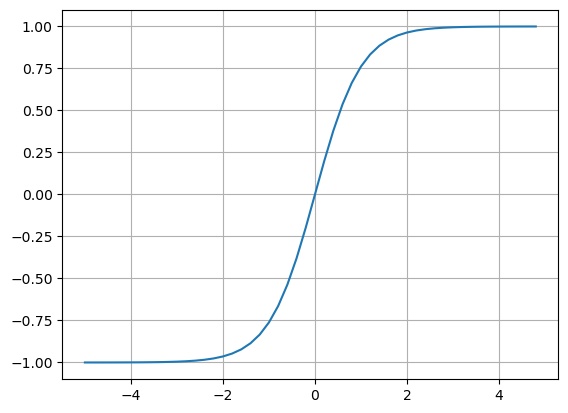

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
o.grad = 1.0

In [ ]:
o.backward()

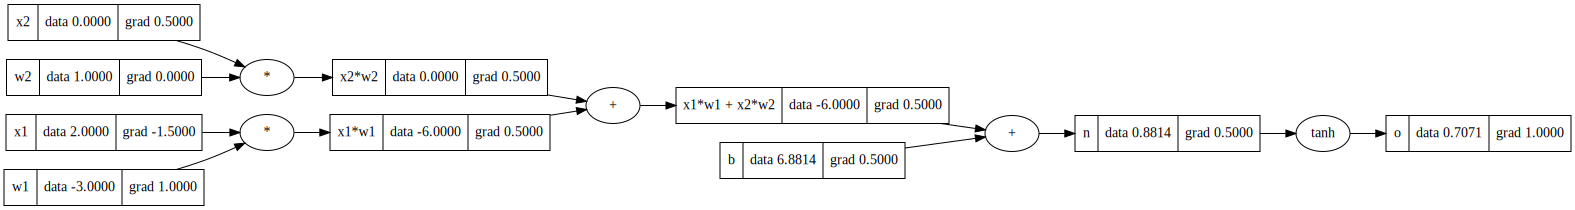

In [ ]:
draw_dot(o)
